In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.compose import ColumnTransformer

In [2]:
df_test = pd.read_csv('./Data/test_t02dQwI.csv')
display(df_test.head(), df_test.shape)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


(5681, 11)

In [3]:
df = pd.read_csv('./Data/train_kOBLwZA.csv')
display(df.head(), df.shape)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(8523, 12)

In [4]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<b>Observations:</b>
<p>We see that the dataframe consist of 4 float columns, 1 int column and 7 object columns. We also see that there are missing values in the columns item_weight and outlet_size.</p>
<p>we also see that there are missing values in colum item_weight and outlet_size.</p>
<br>
<b>Summary Statistics:</b>
<p>We see that item_MRP and Item_Outlet_Sales have a high standard deviation, this means that there are probably outliers.</p>





## EDA

### Check for duplicates

In [5]:
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups))
print(dups.any())

Number of duplicate rows = 0
False


### Check for missing values

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<b>Observation:</b>

<p>We see that low fat and regular fat are written in various ways</p>

In [10]:
## Convert Low Fat, LF to low fat and Regular to regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
for col in ['Item_Weight', 'Outlet_Size']:
    n_miss = df[col].isnull().sum()
    perc = (n_miss / df.shape[0]) * 100
    print(f'{col} has {n_miss} missing values ({perc:.2f}%)')

Item_Weight has 1463 missing values (17.17%)
Outlet_Size has 2410 missing values (28.28%)


In [12]:
def handle_missig_values(df, col, data_type):
    strategy = ''

    if data_type == 'numerical':
        strategy = 'mean'
    else:
        strategy = 'most_frequent'

    si_imputer = SimpleImputer(strategy=strategy)
    si_imputer.fit(df[[col]])
    df[col] = si_imputer.transform(df[[col]]).ravel()

    return df

In [13]:
df_clean = handle_missig_values(df, 'Item_Weight', 'numerical')
df_clean = handle_missig_values(df, 'Outlet_Size', 'categorical')

In [14]:
df_clean.isna().sum().sum()

0

In [15]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df_clean.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

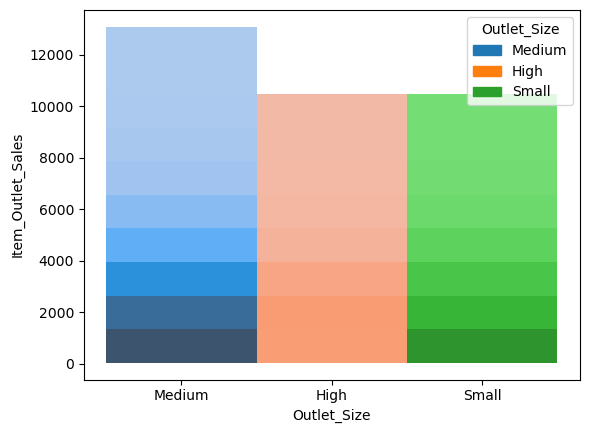

In [17]:
sns.histplot(df_clean, x='Outlet_Size', hue='Outlet_Size', y='Item_Outlet_Sales', bins=10)
plt.show()

In [18]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

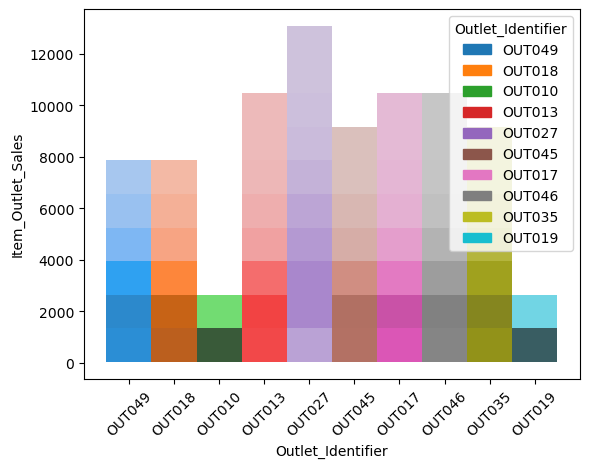

In [19]:
sns.histplot(df_clean, x='Outlet_Identifier', hue='Outlet_Identifier', y='Item_Outlet_Sales', bins=10)
plt.xticks(rotation=45)
plt.show()

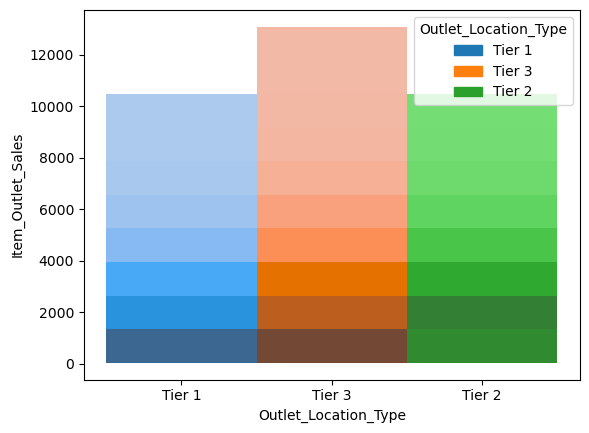

In [20]:
sns.histplot(df_clean, x='Outlet_Location_Type', hue='Outlet_Location_Type', y='Item_Outlet_Sales', bins=10)
plt.show()

In [21]:
# check the outlet size of outlet027
out27_size = df_clean[df_clean['Outlet_Identifier'] == 'OUT027']['Outlet_Size'].value_counts()
out27_tier = df_clean[df_clean['Outlet_Identifier'] == 'OUT027']['Outlet_Location_Type'].value_counts()

display(out27_size, out27_tier)

Medium    935
Name: Outlet_Size, dtype: int64

Tier 3    935
Name: Outlet_Location_Type, dtype: int64

In [22]:
out19_size = df_clean[df_clean['Outlet_Identifier'] == 'OUT019']['Outlet_Size'].value_counts()
out19_tier = df_clean[df_clean['Outlet_Identifier'] == 'OUT019']['Outlet_Location_Type'].value_counts()

display(out19_size, out19_tier)

Small    528
Name: Outlet_Size, dtype: int64

Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [23]:
out10_size = df_clean[df_clean['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].value_counts()
out10_tier = df_clean[df_clean['Outlet_Identifier'] == 'OUT010']['Outlet_Location_Type'].value_counts()

display(out19_size, out19_tier)

Small    528
Name: Outlet_Size, dtype: int64

Tier 1    528
Name: Outlet_Location_Type, dtype: int64

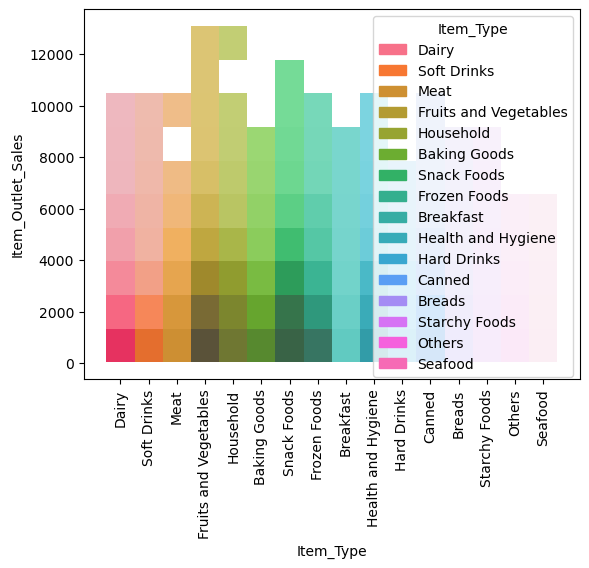

In [24]:
sns.histplot(df_clean, x='Item_Type', hue='Item_Type', y='Item_Outlet_Sales', bins=10)
plt.xticks(rotation=90)
plt.show()

In [25]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


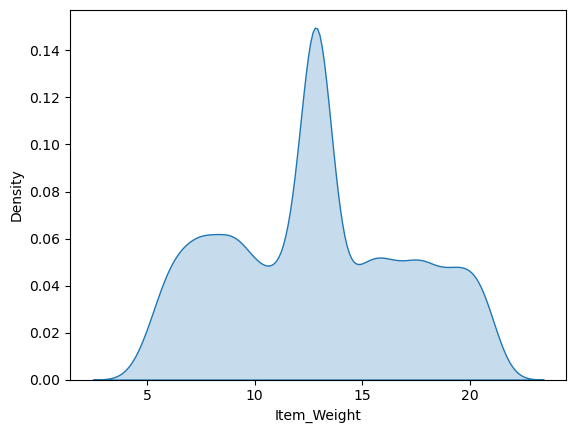

In [27]:
sns.kdeplot(df_clean['Item_Weight'], fill=True)
plt.show()

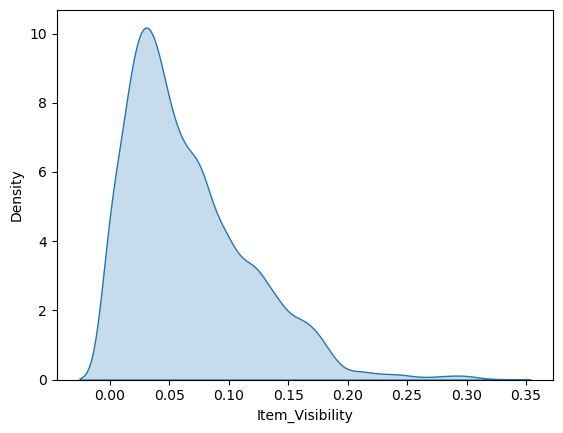

In [28]:
sns.kdeplot(df_clean['Item_Visibility'], fill=True)
plt.show()

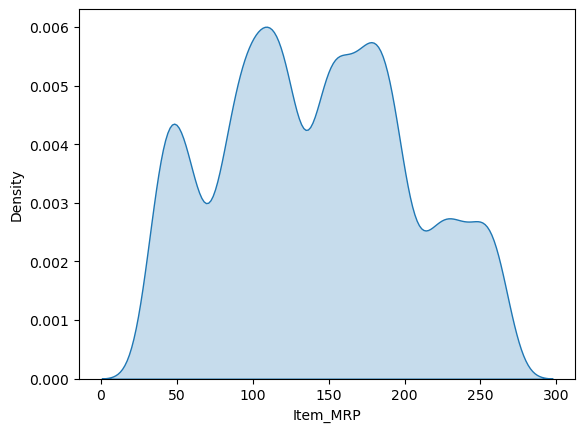

In [29]:
sns.kdeplot(df_clean['Item_MRP'], fill=True)
plt.show()

<b>Observation:</b>
<p>The above data is not normally distributed.</p>

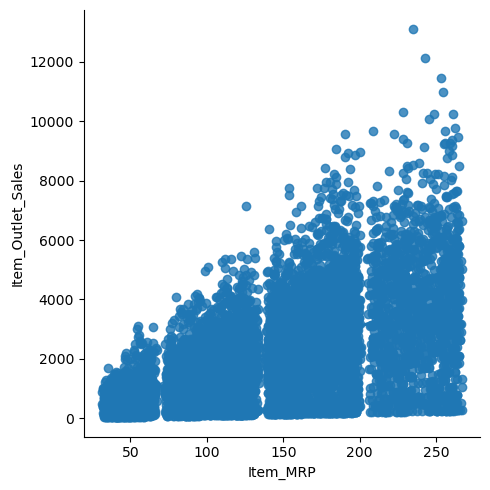

In [30]:
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_clean)
plt.show()

<b>Observation:</b>

<p>The higher the item mrp the higher the sales</p>

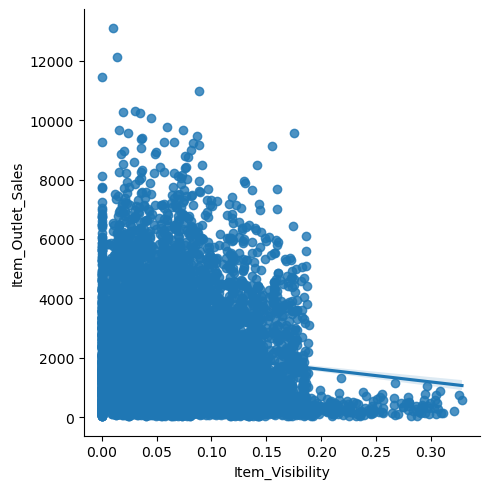

In [31]:
sns.lmplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df_clean)
plt.show()

<b>Observation:</b>
<p>This is very interesting the lower the item_visiblity the higher the sales</P>

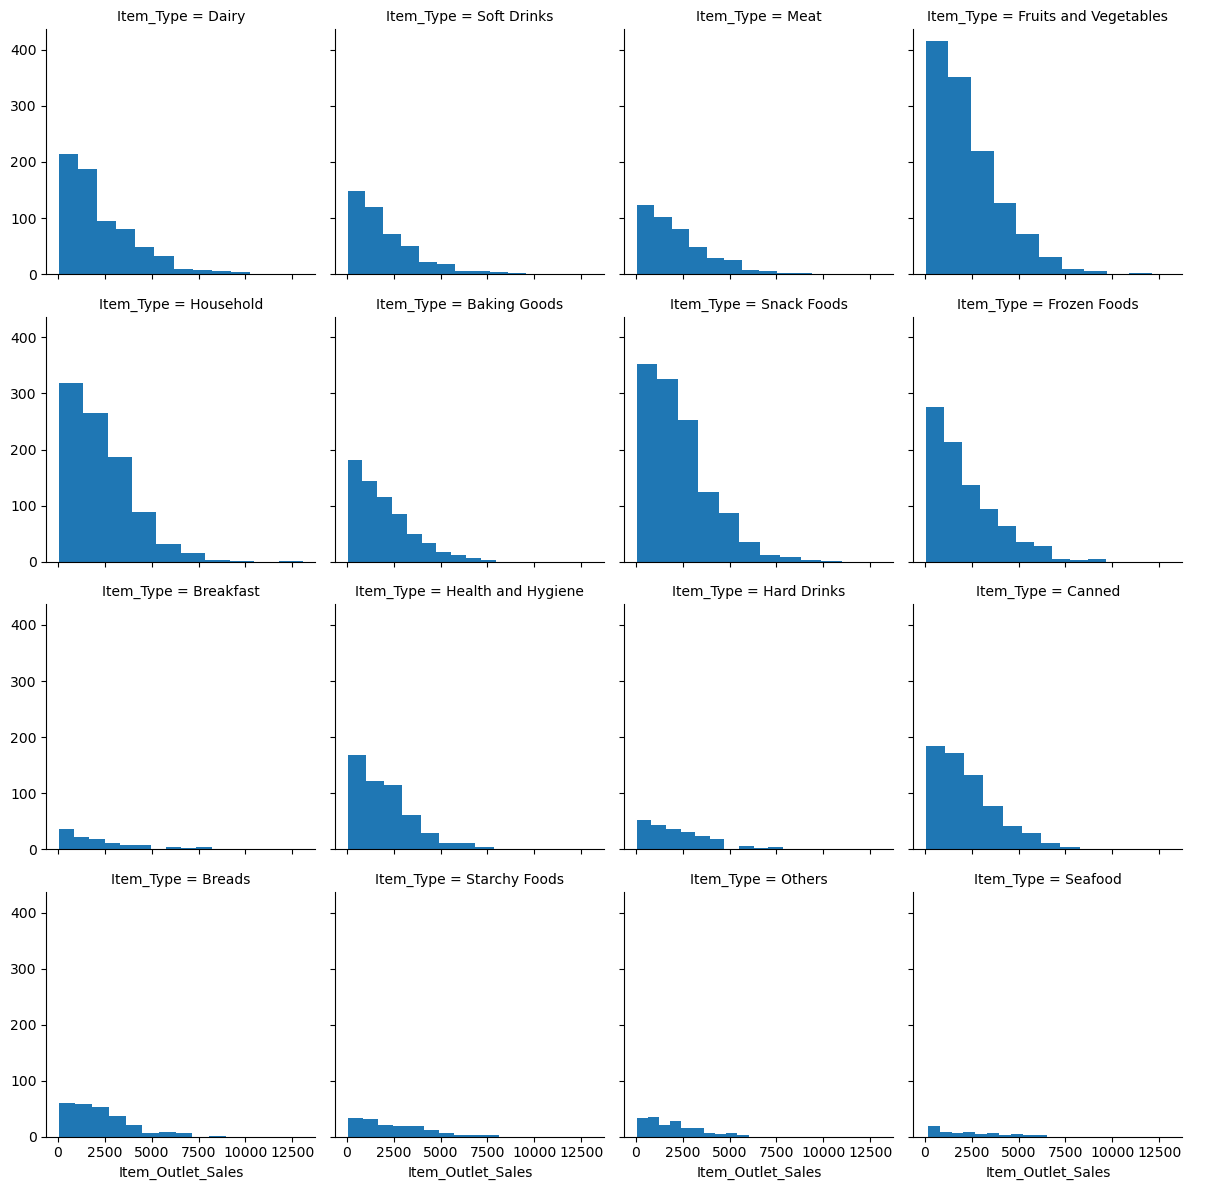

In [32]:
sns.FacetGrid(df, col='Item_Type', height=3, col_wrap=4) \
.map(plt.hist, 'Item_Outlet_Sales') \
.add_legend()
plt.show()

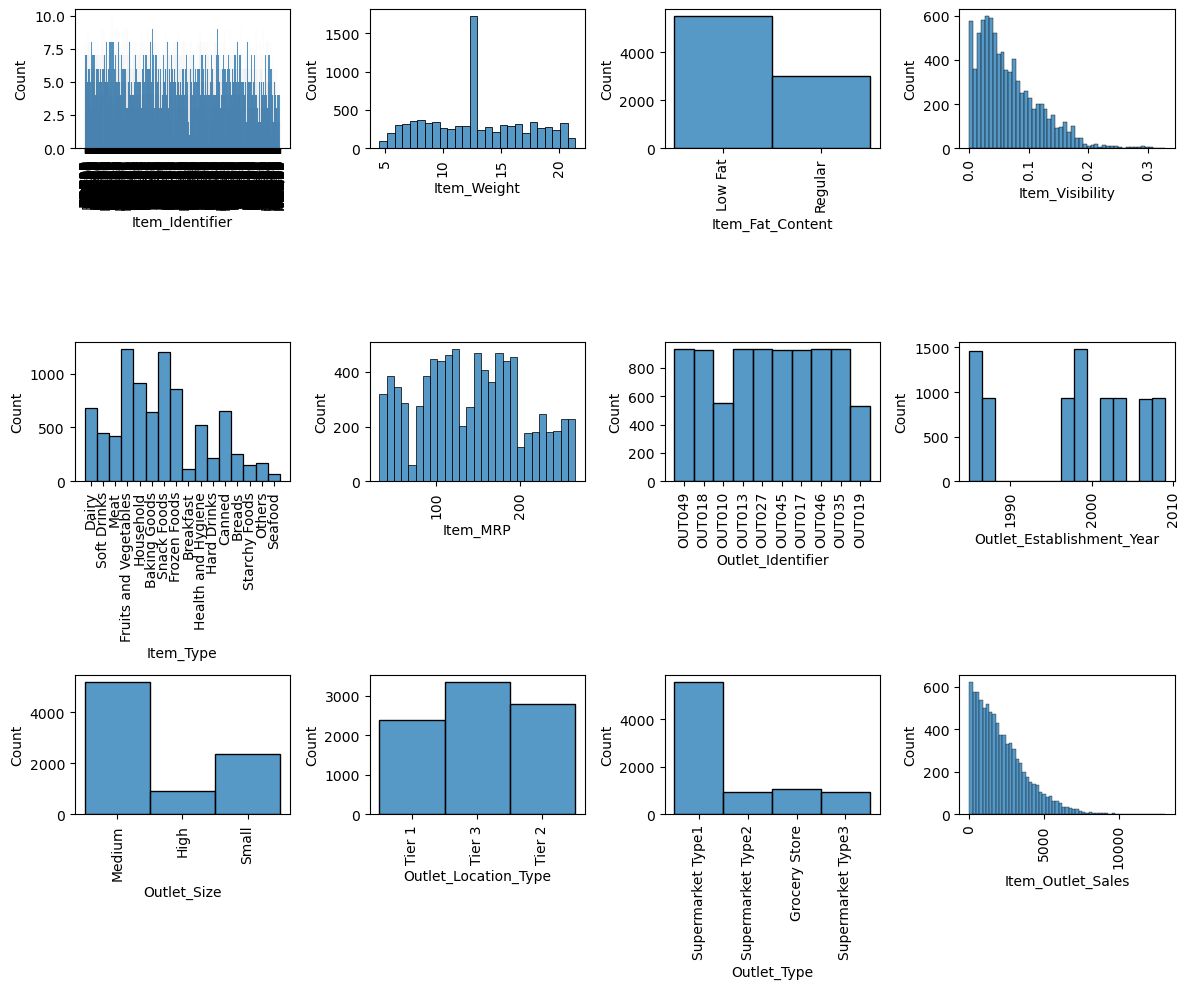

In [33]:
fig, ax = plt.subplots(3, 4, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(df_clean.columns):
    sns.histplot(df_clean, x=col, ax=ax[i])
    ax[i].xaxis.set_major_locator(plt.FixedLocator(ax[i].get_xticks()))

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    plt.tight_layout()

plt.show()

## Outlier Dectection

In [34]:
df_num = df_clean.select_dtypes(include=np.number)
df_cat = df_clean.select_dtypes(include=['object'])

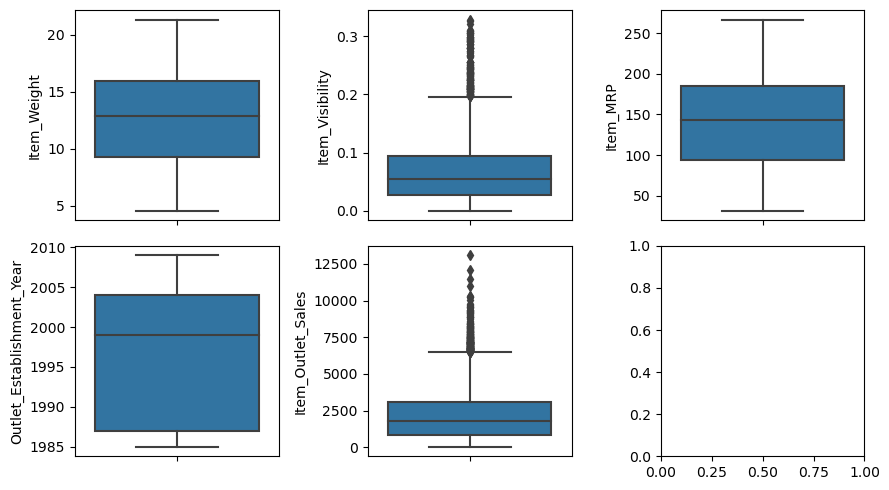

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(9, 5))
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(y=col, data=df_num, ax=ax[i])
plt.tight_layout()
plt.show()

In [36]:
def std_outlier_removal(data, column, threshold):
    data_mean = data[column].mean()
    data_std = data[column].std()
    cut_off = data_std * threshold
    
    lower = data_mean - cut_off
    upper = data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    print('{}'.format(column))
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
    print('Non-outlier observation %d' % len(outliers_removed))

    print('\n')
    df_outliers_removed = data.loc[~data[column].isin(outliers)]
    return df_outliers_removed

In [37]:
df_std = df_num.copy()
df_out_rem = std_outlier_removal(df_std, 'Item_Visibility', 3)
df_out_rem = std_outlier_removal(df_out_rem, 'Item_Outlet_Sales', 3)

Item_Visibility
Identified outliers: 95
Non-outlier observation 8428


Item_Outlet_Sales
Identified outliers: 90
Non-outlier observation 8338




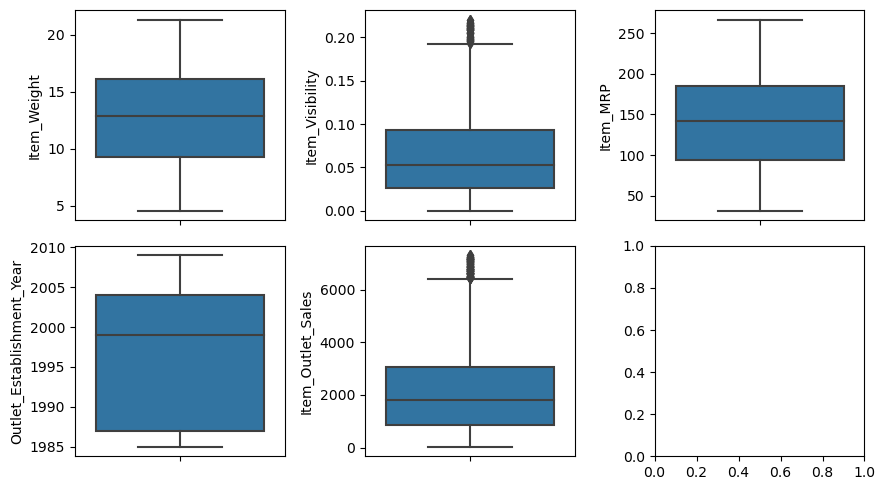

In [38]:
df_num = df_clean.select_dtypes(include=np.number)

fig, ax = plt.subplots(2, 3, figsize=(9, 5))
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(y=col, data=df_out_rem, ax=ax[i])
plt.tight_layout()
plt.show()

In [39]:
target = df_out_rem['Item_Outlet_Sales']
df_out_rem = df_out_rem.drop('Item_Outlet_Sales', axis=1)
df_cat_std = df_cat.loc[df_out_rem.index]
df_std = pd.concat([df_out_rem, df_cat_std], axis=1)
df_new = pd.concat([df_std, target], axis=1)
df_new = df_new.reset_index(drop=True)

display(df_new.head(), df_new.shape)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,0.019278,48.2692,2009,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0.016760,141.6180,1999,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,0.000000,182.0950,1998,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0.000000,53.8614,1987,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052


(8338, 12)

<Axes: >

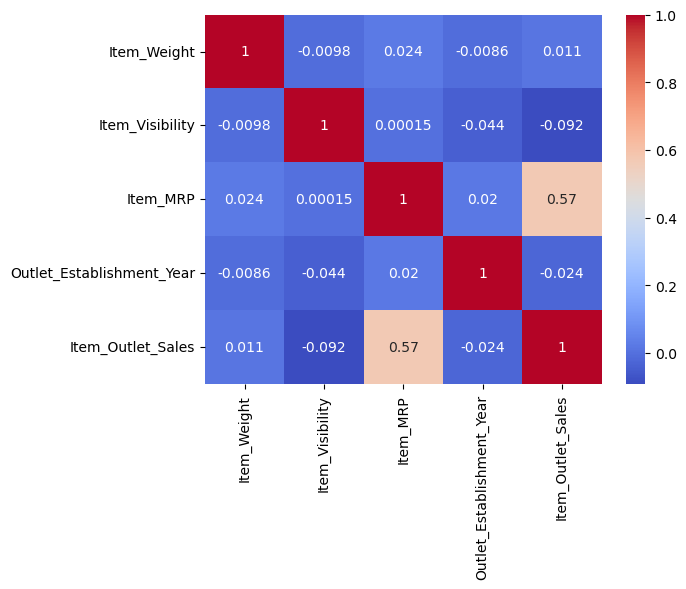

In [40]:
corr = df_new.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### Categorical variables significance

In [41]:
cross_tab = pd.crosstab(index=df_new['Outlet_Size'], columns=df_new['Outlet_Type'])
cross_tab

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,927,0,0
Medium,513,2769,928,875
Small,475,1851,0,0


In [42]:
result = chi2_contingency(cross_tab)

In [43]:
# H0: There is no association between Outlet_Size and Outlet_Type
# result

In [44]:
def cramers_v(var1, var2):
    cross_tab = np.array(pd.crosstab(index=var1, columns=var2, rownames=None, colnames=None))
    stat = chi2_contingency(cross_tab)[0]
    obs = np.sum(cross_tab)
    var3 = min(cross_tab.shape) - 1
    return np.sqrt(stat / (obs * var3))

In [45]:
le = LabelEncoder()
df_encoded = pd.DataFrame()

for i in df_new[['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type']].columns:
    df_encoded[i] = le.fit_transform(df[i])

In [46]:
df_encoded

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,1,1,0
1,2,1,2
2,1,1,0
3,0,1,2
4,1,0,2
...,...,...,...
8518,1,0,2
8519,1,1,1
8520,1,2,1
8521,2,1,2


In [47]:
var4 = []

for var1 in df_encoded:
    col = []
    for var2 in df_encoded:
        cramers = cramers_v(df_encoded[var1], df_encoded[var2])
        col.append(round(cramers, 2))
    var4.append(col)

cramer_results = np.array(var4)
result_cv = pd.DataFrame(cramer_results, columns=df_encoded.columns, index=df_encoded.columns)

In [48]:
result_cv

,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Type,1.00,0.33,0.53
Outlet_Size,0.33,1.00,0.46
Outlet_Location_Type,0.53,0.46,1.00


In [49]:
cramer_results

array([[1.  , 0.33, 0.53],
       [0.33, 1.  , 0.46],
       [0.53, 0.46, 1.  ]])

#### Finding correlation between 1 numerical and 1 categorical variable

In [50]:
# H0 -> There is no correlation
# p value < 0.05 -> reject H0

anova_prep_res = df_clean.groupby('Item_Identifier')['Item_Outlet_Sales'].apply(list)
anova_prep_res

Item_Identifier
DRA12    [2552.6772, 3829.0158, 2552.6772, 992.7078, 85...
DRA24    [1146.5076, 491.3604, 327.5736, 4913.604, 3439...
DRA59    [4442.2176, 1295.6468, 555.2772, 2406.2012, 70...
DRB01                        [1518.024, 2466.789, 569.259]
DRB13     [3415.554, 569.259, 948.765, 3605.307, 3605.307]
                               ...                        
NCZ30    [241.0196, 602.549, 2530.7058, 964.0784, 2530....
NCZ41    [876.1928, 1752.3856, 2127.8968, 2503.408, 187...
NCZ42    [711.0744, 4029.4216, 5451.5704, 4266.4464, 47...
NCZ53    [1884.214, 5652.642, 3203.1638, 376.8428, 3956...
NCZ54    [324.9104, 5523.4768, 2274.3728, 4711.2008, 16...
Name: Item_Outlet_Sales, Length: 1559, dtype: object

In [51]:
anova_results = f_oneway(*anova_prep_res)

print('The p-value is: ', anova_results[1])

The p-value is:  1.2735307576432533e-252


<b>Observation:</b>
<p>There is a correlation between outlet_size and Item_Outlet_Sales because p-vale is smaller then 0.5</p>

## Feature Engineering

In [52]:
display(df_new.head(), df_new.shape)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,0.019278,48.2692,2009,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0.016760,141.6180,1999,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,0.000000,182.0950,1998,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0.000000,53.8614,1987,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052


(8338, 12)

In [53]:
df_new['Outlet_Age'] = 2023 - df_new['Outlet_Establishment_Year']
df_fe = df_new.drop(columns='Outlet_Establishment_Year', axis=1)

In [54]:
df_fe.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [55]:
df_num = df_fe.select_dtypes(include=np.number)
df_target = df_num['Item_Outlet_Sales']

df_num = df_num.drop(columns='Item_Outlet_Sales', axis=1)

df_cat = df_fe.select_dtypes(exclude=np.number)
df_cat_ord = df_cat[['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
df_cat_nom = df_cat.drop(columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1)

display(df_num.head(), df_cat_nom.head(), df_cat_ord.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,24
1,5.92,0.019278,48.2692,14
2,17.50,0.016760,141.6180,24
3,19.20,0.000000,182.0950,25
4,8.93,0.000000,53.8614,36


,Item_Identifier,Item_Type,Outlet_Identifier
0,FDA15,Dairy,OUT049
1,DRC01,Soft Drinks,OUT018
2,FDN15,Meat,OUT049
3,FDX07,Fruits and Vegetables,OUT010
4,NCD19,Household,OUT013


,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Medium,Tier 1,Supermarket Type1
1,Regular,Medium,Tier 3,Supermarket Type2
2,Low Fat,Medium,Tier 1,Supermarket Type1
3,Regular,Medium,Tier 3,Grocery Store
4,Low Fat,High,Tier 3,Supermarket Type1


## Feature Scaling

In [56]:
df_fe.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0.016047,249.8092,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,5.92,0.019278,48.2692,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,17.50,0.016760,141.6180,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,19.20,0.000000,182.0950,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,732.3800,25
4,8.93,0.000000,53.8614,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052,36


In [57]:
X = df_fe.drop(columns='Item_Outlet_Sales', axis=1)
y = df_fe['Item_Outlet_Sales']

In [59]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
import pandas as pd

mm = MinMaxScaler()
df_scaled_num = mm.fit_transform(df_num)

oe = OrdinalEncoder()
df_scaled_ord = oe.fit_transform(df_cat_ord)

le = LabelEncoder()
for i in df_cat_nom.columns:
    df_cat_nom[i] = le.fit_transform(df_cat_nom[i])

df_scaled_nom = pd.DataFrame(df_cat_nom, columns=df_cat_nom.columns, index=df_cat_nom.index)

X = pd.concat([pd.DataFrame(df_scaled_num, columns=df_num.columns),
                      pd.DataFrame(df_scaled_ord, columns=df_cat_ord.columns),
                      df_scaled_nom], axis=1)

X


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Item_Type,Outlet_Identifier
0,0.282525,0.072868,0.927507,0.416667,0.0,1.0,0.0,1.0,156,4,9
1,0.081274,0.087538,0.072068,0.000000,1.0,1.0,2.0,2.0,8,14,3
2,0.770765,0.076104,0.468288,0.416667,0.0,1.0,0.0,1.0,662,10,9
3,0.871986,0.000000,0.640093,0.458333,1.0,1.0,2.0,0.0,1121,6,0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,2.0,1.0,1297,9,1
...,...,...,...,...,...,...,...,...,...,...,...
8333,0.137541,0.257842,0.777729,0.916667,0.0,0.0,2.0,1.0,370,13,1
8334,0.227746,0.213338,0.326263,0.291667,1.0,1.0,1.0,1.0,897,0,7
8335,0.359929,0.159774,0.228492,0.208333,0.0,2.0,1.0,1.0,1357,8,6
8336,0.158083,0.659418,0.304939,0.000000,1.0,1.0,2.0,2.0,681,13,3


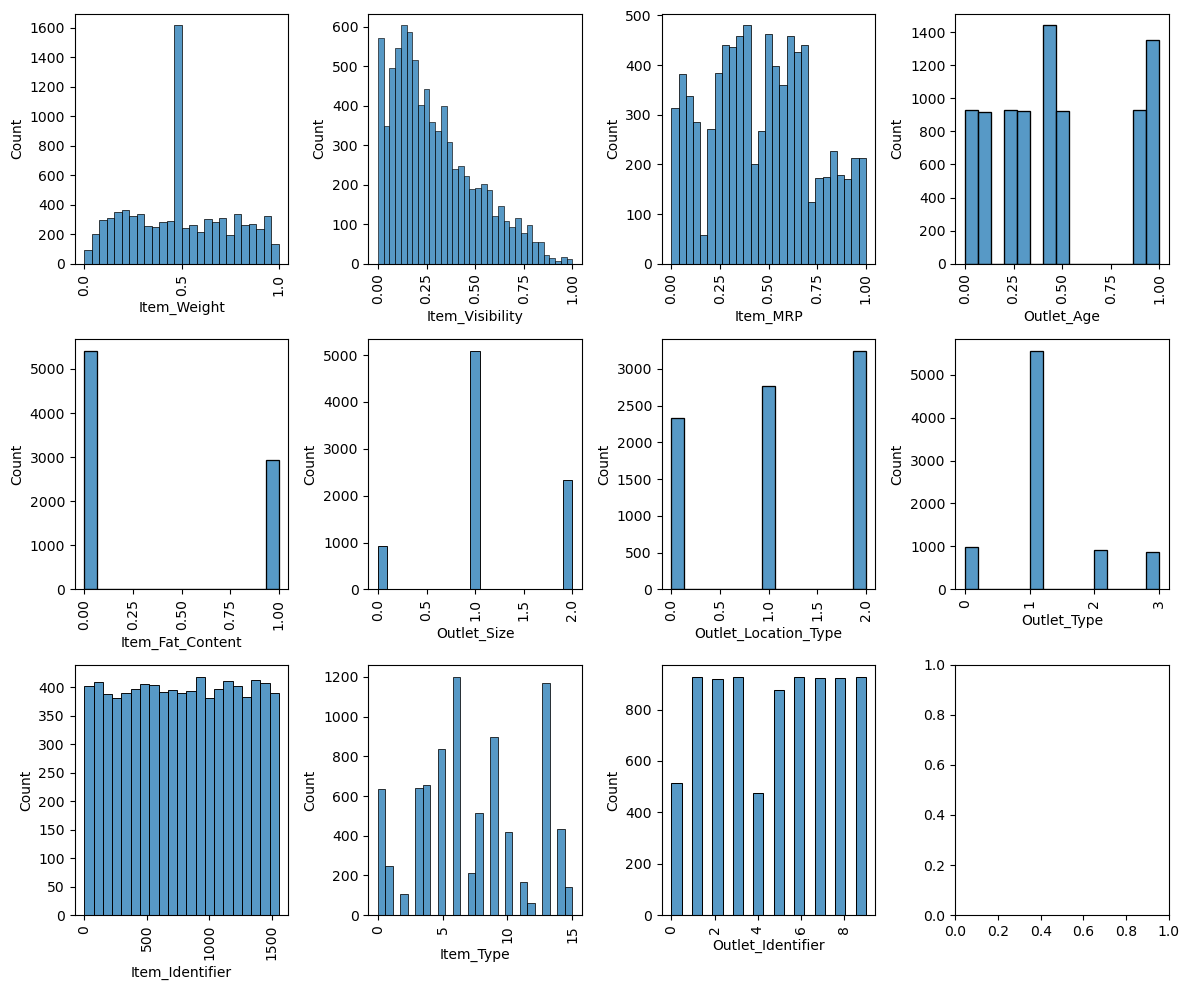

In [75]:
fig, ax = plt.subplots(3, 4, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(X, x=col, ax=ax[i])
    ax[i].xaxis.set_major_locator(plt.FixedLocator(ax[i].get_xticks()))

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    plt.tight_layout()

plt.show()

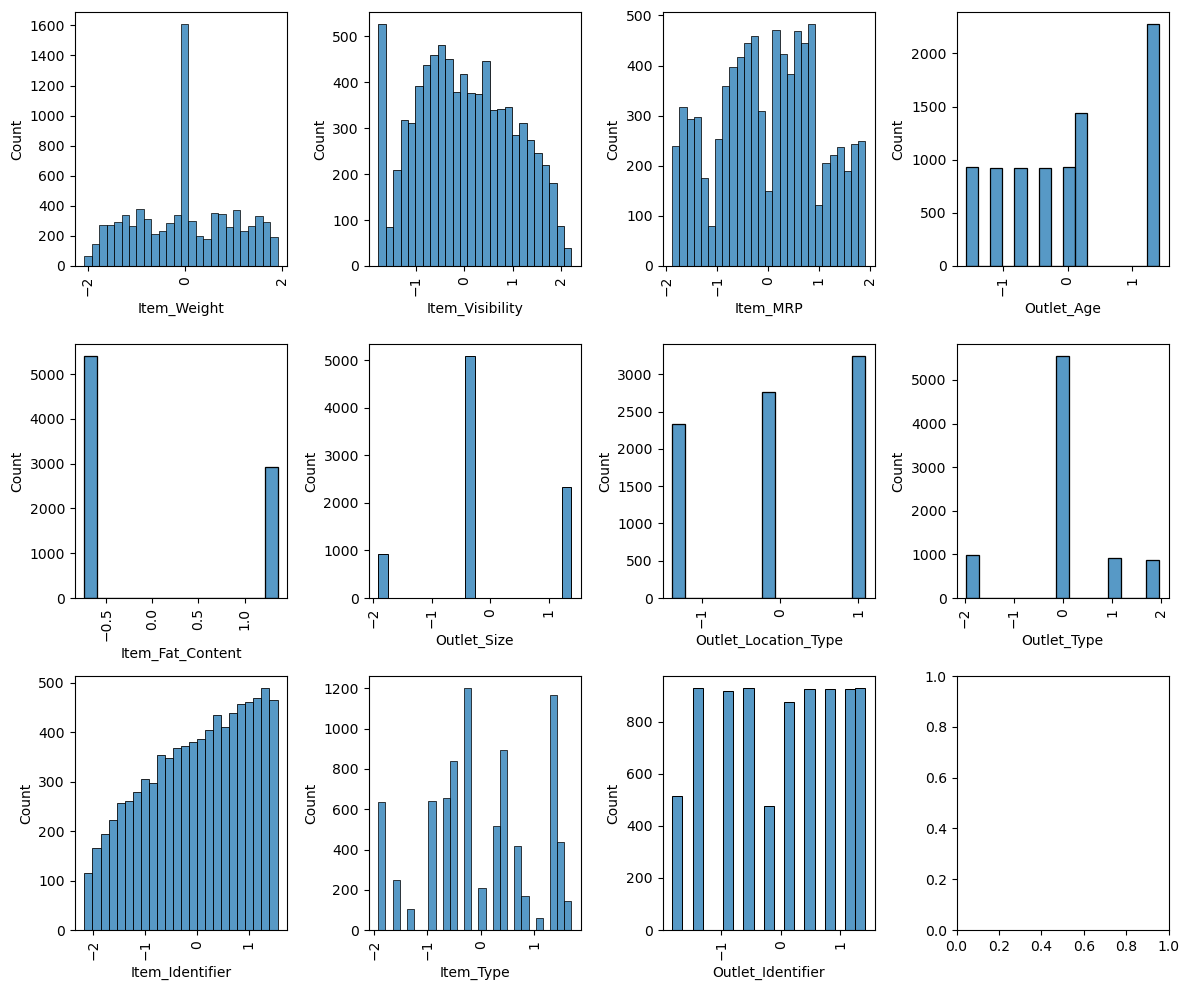

In [76]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer()
df_pt = pt.fit_transform(X)

df_pt = pd.DataFrame(df_pt, columns=X.columns, index=X.index)

fig, ax = plt.subplots(3, 4, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(df_pt.columns):
    sns.histplot(df_pt, x=col, ax=ax[i])
    ax[i].xaxis.set_major_locator(plt.FixedLocator(ax[i].get_xticks()))

    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    plt.tight_layout()

plt.show()


In [82]:
X = df_pt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

power_trans = PowerTransformer(method='yeo-johnson')
skb_f_sel = SelectKBest(score_func=mutual_info_regression, k=8)
model = GradientBoostingRegressor()

pipeline = Pipeline(steps=[('pt', power_trans), ('sk', skb_f_sel), ('model', model)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X_train, y_train, cv=cv, n_jobs=-1)

print('>%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

>0.584 (0.019)


### Modeling

In [64]:
models = [('lr', LinearRegression()), ('ElasticNet', ElasticNet(max_iter=1000)), ('rf', RandomForestRegressor()),
          ('etr', ExtraTreesRegressor()), ('gbr', GradientBoostingRegressor()), ('mlp', MLPRegressor(max_iter=1000))]

In [65]:
def model_selection(X, y, cross_folds, model):
    scores = []
    names = []

    for name, model in models:
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=123)
        cv_results = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
        print(f'{name}: {round(np.mean(cv_results), 4)} ({round(np.std(cv_results), 4)})')

In [66]:
model_selection(X_train, y_train, 5, models)

lr: 0.4903 (0.0188)
ElasticNet: 0.2076 (0.0166)
rf: 0.5445 (0.0279)
etr: 0.5298 (0.0266)
gbr: 0.5837 (0.0206)
mlp: 0.4832 (0.0203)
